# Inspecting gradients

This example assumes you've read `advanced.ipynb`, and covers:

   - Inspecting gradients per layer
   - Estimating good values of gradient clipping threshold

In [1]:
import deeptrain
deeptrain.append_examples_dir_to_sys_path()

from utils import make_autoencoder, init_session
from utils import AE_CONFIGS as C

from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'  # greatly improve display quality

### Configure training

In [3]:
C['traingen']['iter_verbosity'] = 0  # silence iteration printing since currently irrelevant
tg = init_session(C, make_autoencoder)

Discovered 48 files with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Discovered 36 files with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

NOTE: will exclude `labels` from saving when `input_as_labels=True`; to keep 'labels', add '{labels}'to `saveskip_list` instead
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 36 files with matching format
.................................... finished, w/ 4608 total sample

### Expected gradient norm estimation
We iterate over entire train dataset, gathering gradients from every fit and computing and storing their L2-norms.

Computing gradient l2-norm over datagen batches, in inference mode
'.' = slice processed, '|' = batch processed

Data set_nums shuffled

||||||||||10||||||||||20||||||||||30||||||||||40||||||||
Data set_nums shuffled


GRADIENT L2-NORM (AVG, MAX) = (0.003, 0.003), computed over 48 batches, 48 datagen updates


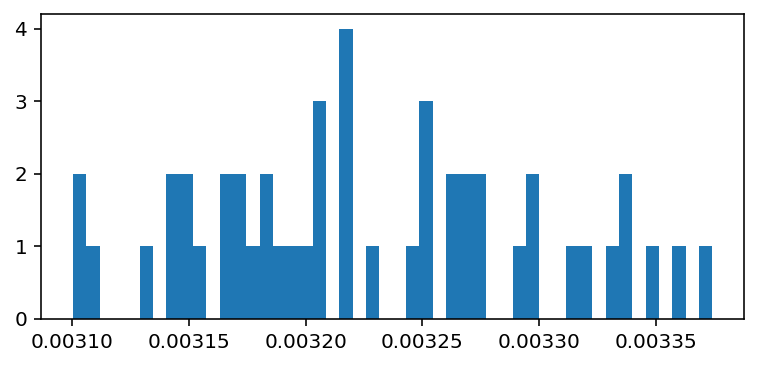

In [4]:
grad_norms, *_ = tg.gradient_norm_over_dataset()

We can now restart training with setting optimizer `clipnorm` to 1.5x average value, avoiding extreme gradients while not clipping most standard gradients

Discovered 48 files with matching format
48 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

Discovered 36 files with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated

NOTE: will exclude `labels` from saving when `input_as_labels=True`; to keep 'labels', add '{labels}'to `saveskip_list` instead
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 48 files with matching format
................................................ finished, w/ 6144 total samples
Train initial data prepared
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 36 files with matching format
.................................... finished, w/ 4608 total sample

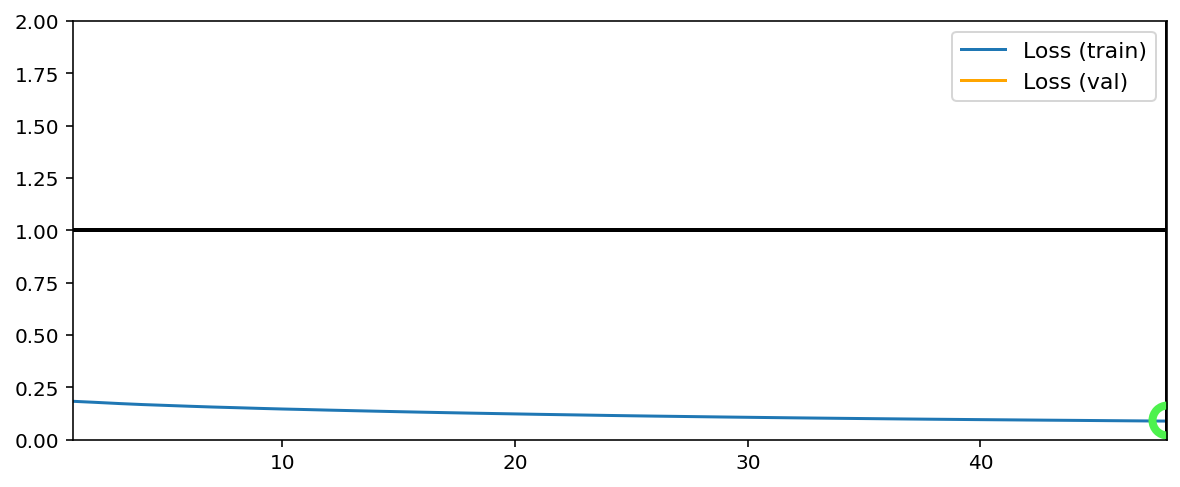

Training has concluded.


In [5]:
C['model']['optimizer'] = Adam(clipnorm=1.5 * np.mean(grad_norms))
tg = init_session(C, make_autoencoder)
tg.epochs = 1  # train just for demo
tg.train()

### Complete gradient sum
This time we run a cumulative sum over actual gradient tensors, preserving and returning their shapes, allowing per-weight visualization

Computing gradients sum over datagen batches, in inference mode
'.' = slice processed, '|' = batch processed

Data set_nums shuffled

||||||||||10||||||||||20||||||||||30||||||||||40||||||||
Data set_nums shuffled


GRADIENTS SUM computed over 48 batches, 48 datagen updates:


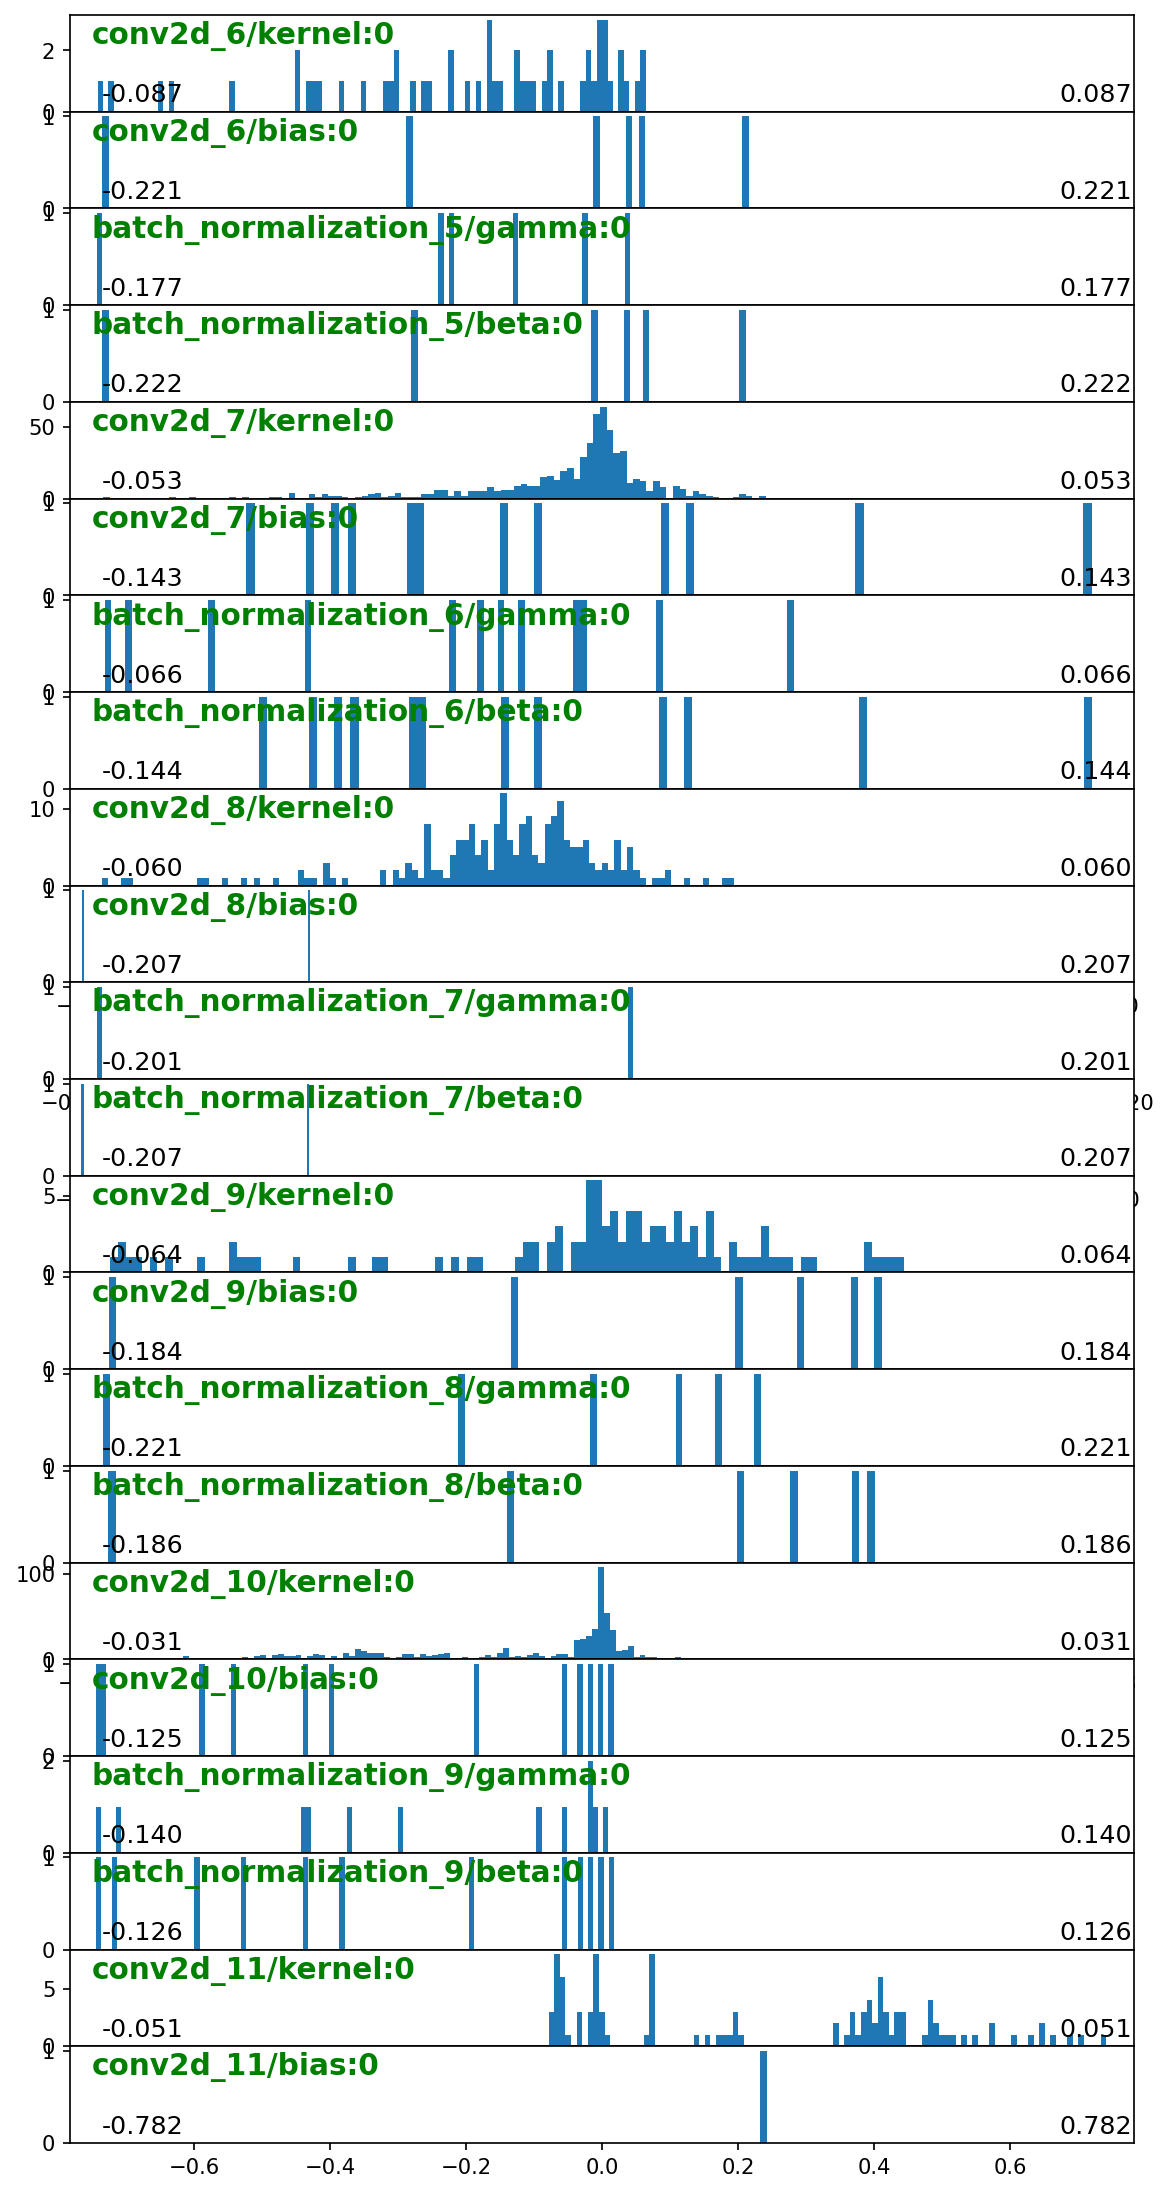

In [6]:
plot_kw = {'h': 2}  # double default height since we expect many weights
grads_sum, *_ = tg.gradient_sum_over_dataset(plot_kw=plot_kw)

We can use the mean of `grads_sum` to set `clipvalue` instead of `clipnorm`.